In [2]:
 Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,
confidence values
2) Change the minimum length in apriori algorithm
3) Visualize the obtained rules using different plots 

SyntaxError: invalid syntax (<ipython-input-2-efbc6eaa976c>, line 1)

In [1]:
# Import Data from CSV file 
import numpy as np
import pandas as pd 
dataset = pd.read_csv('book.csv',sep=',')

In [2]:
dataset

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
dataset
transactions = []
for i in range(0, 2000):
    transactions.append([str(dataset.values[i,u]) for u in range(1, 10)])

In [5]:
pip install mlxtend

  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(dataset, min_support=0.005,max_len=3,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(Florence, ItalCook, GeogBks)"
220,0.0115,"(ItalAtlas, GeogBks, ItalArt)"
221,0.0090,"(Florence, GeogBks, ItalArt)"
222,0.0125,"(ItalAtlas, ItalCook, ItalArt)"


In [8]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of      support                         itemsets
2     0.4310                        (CookBks)
0     0.4230                       (ChildBks)
3     0.2820                       (DoItYBks)
6     0.2760                        (GeogBks)
12    0.2560              (CookBks, ChildBks)
..       ...                              ...
206   0.0065    (ItalAtlas, Florence, RefBks)
64    0.0065            (ItalAtlas, Florence)
207   0.0055      (Florence, RefBks, ItalArt)
109   0.0055  (ChildBks, ItalAtlas, Florence)
145   0.0055    (ItalArt, Florence, YouthBks)

[224 rows x 2 columns]>

In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
750,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
751,(ItalAtlas),"(RefBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
747,(ItalArt),"(ItalAtlas, ArtBks)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
742,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
350,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
355,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
562,"(ItalCook, RefBks)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
563,(ItalAtlas),"(ItalCook, RefBks)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
925,(ItalArt),"(ItalAtlas, GeogBks)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939
920,"(ItalAtlas, GeogBks)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306


In [10]:
def to_list(i):
    return sorted(i)
ma_x = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_x = ma_x.apply(sorted)
ma_x

0                 [ChildBks, CookBks]
1                 [ChildBks, CookBks]
2                 [ChildBks, GeogBks]
3                 [ChildBks, GeogBks]
4                  [CookBks, GeogBks]
                    ...              
1049    [Florence, ItalArt, YouthBks]
1050    [Florence, ItalArt, YouthBks]
1051    [Florence, ItalArt, YouthBks]
1052    [Florence, ItalArt, YouthBks]
1053    [Florence, ItalArt, YouthBks]
Length: 1054, dtype: object

In [11]:
return_rules = list(ma_x)
unique_rules = [list(m) for m in set(tuple(i) for i in return_rules)]
unique_rules

[['CookBks', 'DoItYBks', 'Florence'],
 ['Florence', 'ItalAtlas', 'RefBks'],
 ['DoItYBks', 'ItalCook'],
 ['CookBks', 'GeogBks', 'ItalCook'],
 ['ItalCook', 'RefBks', 'YouthBks'],
 ['DoItYBks', 'ItalArt', 'RefBks'],
 ['ItalArt', 'RefBks', 'YouthBks'],
 ['CookBks', 'ItalCook'],
 ['DoItYBks', 'GeogBks', 'ItalCook'],
 ['CookBks', 'ItalArt', 'ItalAtlas'],
 ['ChildBks', 'CookBks', 'ItalCook'],
 ['ArtBks', 'DoItYBks', 'YouthBks'],
 ['Florence', 'GeogBks', 'ItalCook'],
 ['CookBks', 'DoItYBks', 'ItalCook'],
 ['ArtBks', 'ItalAtlas', 'YouthBks'],
 ['ArtBks', 'CookBks', 'GeogBks'],
 ['CookBks', 'ItalAtlas', 'ItalCook'],
 ['GeogBks', 'RefBks', 'YouthBks'],
 ['ArtBks', 'YouthBks'],
 ['ArtBks', 'Florence', 'ItalCook'],
 ['Florence', 'ItalArt', 'RefBks'],
 ['ArtBks', 'DoItYBks', 'RefBks'],
 ['Florence', 'ItalAtlas'],
 ['ChildBks', 'GeogBks', 'YouthBks'],
 ['ArtBks', 'DoItYBks', 'ItalAtlas'],
 ['ArtBks', 'ItalAtlas', 'RefBks'],
 ['ArtBks', 'ChildBks', 'YouthBks'],
 ['ArtBks', 'DoItYBks', 'ItalArt'],
 ['G

In [12]:
index_rules = []
for i in unique_rules:
    index_rules.append(return_rules.index(i))

In [13]:
##Getting the rules without any reducdancies
rules_without_reducdancies = rules.iloc[index_rules,:]
rules_without_reducdancies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
542,"(DoItYBks, CookBks)",(Florence),0.1875,0.1085,0.0235,0.125333,1.155146,0.003156,1.019245
1028,"(ItalAtlas, Florence)",(RefBks),0.0065,0.2145,0.0065,1.000000,4.662005,0.005106,inf
248,(DoItYBks),(ItalCook),0.2820,0.1135,0.0585,0.207447,1.827725,0.026493,1.118537
222,"(CookBks, ItalCook)",(GeogBks),0.1135,0.2760,0.0640,0.563877,2.043031,0.032674,1.660081
506,"(ItalCook, RefBks)",(YouthBks),0.0465,0.2475,0.0265,0.569892,2.302596,0.014991,1.749562
...,...,...,...,...,...,...,...,...,...
822,"(DoItYBks, Florence)",(RefBks),0.0315,0.2145,0.0145,0.460317,2.146002,0.007743,1.455485
634,"(ChildBks, ItalAtlas)",(ItalCook),0.0285,0.1135,0.0200,0.701754,6.182858,0.016765,2.972382
1016,"(DoItYBks, Florence)",(ItalArt),0.0315,0.0485,0.0075,0.238095,4.909180,0.005972,1.248844
92,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797


In [15]:
rules_without_reducdancies.sort_values('lift', ascending = False, inplace = True)

<ipython-input-15-c3667c2102ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_reducdancies.sort_values('lift', ascending = False, inplace = True)


In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
support = rules_without_reducdancies["support"]
confidence = rules_without_reducdancies["confidence"]
lift = rules_without_reducdancies["lift"]

Text(0.5, 0, 'lift')

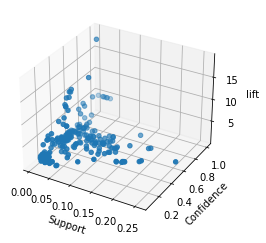

In [18]:
fig = plt.figure()
ax= fig.add_subplot(111, projection = '3d')
ax.scatter(support,confidence,lift)
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("lift")

Text(0, 0.5, 'confidence')

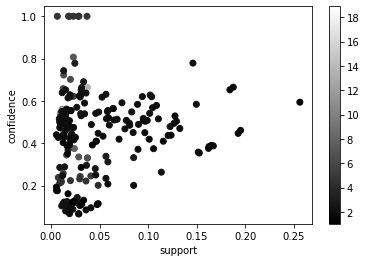

In [19]:
import scipy as sp
plt.scatter(x=support, y=confidence, c=lift , cmap = 'gray')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")

In [20]:
Changing the support value to 0.1

SyntaxError: invalid syntax (<ipython-input-20-e9bdedbfc54d>, line 1)

In [22]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets2 = apriori(dataset, min_support=0.1,max_len=4,use_colnames = True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [23]:
frequent_itemsets2.sort_values('support',ascending = False,inplace=True)
frequent_itemsets2.sort_values

<bound method DataFrame.sort_values of     support                       itemsets
2    0.4310                      (CookBks)
0    0.4230                     (ChildBks)
3    0.2820                     (DoItYBks)
6    0.2760                      (GeogBks)
10   0.2560            (CookBks, ChildBks)
1    0.2475                     (YouthBks)
5    0.2410                       (ArtBks)
4    0.2145                       (RefBks)
14   0.1950            (ChildBks, GeogBks)
22   0.1925             (CookBks, GeogBks)
19   0.1875            (DoItYBks, CookBks)
11   0.1840           (DoItYBks, ChildBks)
21   0.1670              (CookBks, ArtBks)
9    0.1650           (ChildBks, YouthBks)
13   0.1625             (ChildBks, ArtBks)
15   0.1620            (CookBks, YouthBks)
20   0.1525              (CookBks, RefBks)
12   0.1515             (ChildBks, RefBks)
33   0.1495   (CookBks, ChildBks, GeogBks)
30   0.1460  (DoItYBks, CookBks, ChildBks)
26   0.1325            (DoItYBks, GeogBks)
29   0.1290  (C

In [24]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2.head(20)
rules2.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
63,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
86,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
91,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
97,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
92,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
85,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
80,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
81,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
84,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [25]:
rules2.sort_values('lift',ascending = False , inplace = True)

In [26]:
def to_list1(i):
    return(sorted(i))

ma_x1 = rules2.antecedents.apply(to_list1)+ rules2.consequents.apply(to_list1)
ma_x1 = ma_x1.apply(sorted)
ma_x1

62            [CookBks, ItalCook]
63            [CookBks, ItalCook]
86    [ArtBks, ChildBks, GeogBks]
91    [ArtBks, ChildBks, GeogBks]
97    [ArtBks, CookBks, DoItYBks]
                 ...             
8            [ChildBks, DoItYBks]
16            [CookBks, YouthBks]
17            [CookBks, YouthBks]
1             [ChildBks, CookBks]
0             [ChildBks, CookBks]
Length: 100, dtype: object

In [27]:
return_rules1 = list(ma_x1)
unique_rules1 = [list(m) for m in set(tuple(i) for i  in return_rules1 )]

In [69]:
index_rules1 = []
for i in unique_rules1:
    index_rules1.append(return_rules1.index(i))

In [29]:
rules_without_reduc = rules2.iloc[index_rules1,:]

In [31]:
rules_without_reduc.sort_values('lift', ascending = False, inplace = True)

<ipython-input-31-e2229c2309b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_reduc.sort_values('lift', ascending = False, inplace = True)


In [32]:
rules_without_reduc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
86,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
97,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
85,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
52,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
27,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
71,(GeogBks),"(DoItYBks, CookBks)",0.2760,0.1875,0.1085,0.393116,2.096618,0.056750,1.338806
74,"(DoItYBks, ChildBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673
49,(ArtBks),"(CookBks, ChildBks)",0.2410,0.2560,0.1265,0.524896,2.050376,0.064804,1.565974
41,(YouthBks),"(CookBks, ChildBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924


In [33]:
rules_without_reduc.shape

(30, 9)

In [34]:
support2 = rules_without_reduc["support"]
confidence2 =  rules_without_reduc["confidence"]
lift2 = rules_without_reduc["lift"]

Text(0.5, 0, 'lift')

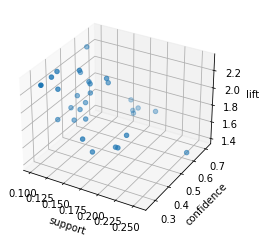

In [35]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support2,confidence2,lift2)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

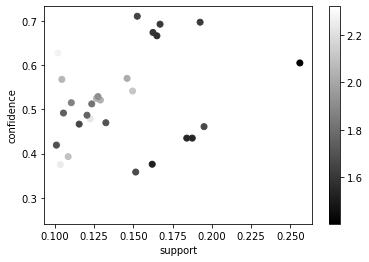

In [36]:
plt.scatter(support2,confidence2, c =lift2, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [ ]:
Movies Dataset

In [40]:
# Import Data from CSV file 
import numpy as np
import pandas as pd 
movies = pd.read_csv('my_movies.csv',sep=',')

In [41]:
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [42]:
movies = movies.iloc[:,[0,1,2,3,4]]

In [43]:
movies.iloc[:,2:5] = movies.iloc[:,2:5].apply(lambda x:x.fillna(0))

/Users/sadhanasrinivasan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-43-6307bd75c3dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.iloc[:,2:5] = movies.iloc[:,2:5].apply(lambda x:x.fillna(0))


In [44]:
X = pd.get_dummies(movies[['V1','V2','V3','V4','V5']])
X

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_0,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_0,V4_Green Mile,V5_0,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1
1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
6,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
7,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
9,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0


In [45]:
x_dummies = X.iloc[:,[9,14,16]]

In [46]:
frequent_items = apriori(x_dummies,min_support = 0.05, max_len =2 , use_colnames = True )
frequent_items.sort_values('support', ascending = False, inplace = True)

In [47]:
frequent_items

,support,itemsets
2,0.9,(V5_0)
1,0.8,(V4_0)
5,0.8,"(V5_0, V4_0)"
0,0.3,(V3_0)
3,0.3,"(V3_0, V4_0)"
4,0.3,"(V3_0, V5_0)"


In [48]:
frequent_items.sort_values('support', ascending = False, inplace = True)

In [49]:
rules_dummies = association_rules(frequent_items, metric = 'lift', min_threshold = 1)

In [50]:
rules_dummies.sort_values('lift',ascending =False,inplace =True)

In [51]:
rules_dummies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(V3_0),(V4_0),0.3,0.8,0.3,1.000000,1.250000,0.06,inf
3,(V4_0),(V3_0),0.8,0.3,0.3,0.375000,1.250000,0.06,1.12
0,(V5_0),(V4_0),0.9,0.8,0.8,0.888889,1.111111,0.08,1.80
1,(V4_0),(V5_0),0.8,0.9,0.8,1.000000,1.111111,0.08,inf
4,(V3_0),(V5_0),0.3,0.9,0.3,1.000000,1.111111,0.03,inf
5,(V5_0),(V3_0),0.9,0.3,0.3,0.333333,1.111111,0.03,1.05


In [52]:
### To eliminate redudancy in rules#
def to_list(i):
    return(sorted(i))

In [54]:
rules_add = rules_dummies.antecedents.apply(to_list) + rules_dummies.consequents.apply(to_list)
rules_add

2    [V3_0, V4_0]
3    [V4_0, V3_0]
0    [V5_0, V4_0]
1    [V4_0, V5_0]
4    [V3_0, V5_0]
5    [V5_0, V3_0]
dtype: object

In [56]:
rules_add = rules_add.apply(sorted)
rules_set = list(rules_add)

In [70]:
unique_rules = [list(m) for m in set(tuple(i) for i in rules_set)]
index_rules = []
for i in unique_rules:
    index_rules.append(rules_set.index(i))

In [58]:
rules_without_redud = rules_dummies.iloc[index_rules,:]
rules_without_redud

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V5_0),(V4_0),0.9,0.8,0.8,0.888889,1.111111,0.08,1.8
2,(V3_0),(V4_0),0.3,0.8,0.3,1.000000,1.250000,0.06,inf
4,(V3_0),(V5_0),0.3,0.9,0.3,1.000000,1.111111,0.03,inf


In [59]:
Support = rules_without_redud['support']
confidence = rules_without_redud['confidence']

In [60]:
support

742    0.0165
350    0.0375
920    0.0115
896    0.0125
962    0.0095
        ...  
542    0.0235
588    0.0225
300    0.0485
410    0.0315
306    0.0475
Name: support, Length: 212, dtype: float64

In [61]:
confidence

0    0.888889
2    1.000000
4    1.000000
Name: confidence, dtype: float64

Text(0, 0.5, 'Confidence')

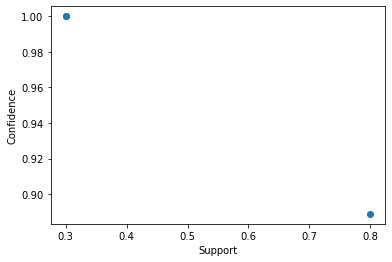

In [62]:
import matplotlib.pyplot as plt

plt.scatter(Support,confidence)
plt.xlabel("Support")
plt.ylabel("Confidence")

In [63]:
x_without_dum = X.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,15,17]]

In [64]:
frequents_item1 = apriori(x_without_dum, min_support=0.005, max_len = 2, use_colnames=True)
frequents_item1.sort_values('support',ascending = False, inplace = True)

In [65]:
rules_without = association_rules(frequents_item1, metric='lift', min_threshold =1)
rules_without.sort_values('lift',ascending = False, inplace =True)

In [66]:
def to_list_out(i):
    return(sorted(i))

In [67]:
rules_out_add = rules_without.antecedents.apply(to_list_out)+rules_without.consequents.apply(to_list_out)

rules_out_add = rules_out_add.apply(sorted)
rules_set_out = list(rules_out_add)

In [73]:
rules_without_out = rules_without.iloc[index_rules,:]

In [75]:
Support_out = rules_without_out["support"]
Confidence_out = rules_without_out["confidence"]
lift = rules_without_out["lift"]
Support_out

38    0.1
10    0.1
16    0.1
Name: support, dtype: float64

In [76]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'lift')

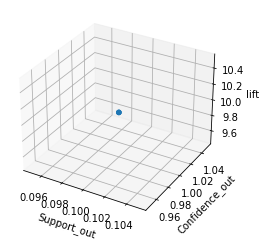

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(Support_out, Confidence_out, lift)
ax.set_xlabel("Support_out")
ax.set_ylabel("Confidence_out")
ax.set_zlabel("lift")

Text(0, 0.5, 'Confidence')

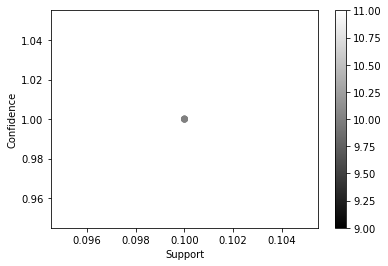

In [78]:
import matplotlib.pyplot as plt
import scipy as sp

plt.scatter(Support_out, Confidence_out,c= lift,cmap='gray')
plt.colorbar()
plt.xlabel("Support")
plt.ylabel("Confidence")

In [ ]:
Approach 2 :

In [20]:
dataset
transactions = []
for i in range(10, 16):
    transactions.append([str(dataset.values[i,u]) for u in range(10, 16)]) 

IndexError: index 10 is out of bounds for axis 0 with size 10

In [ ]:
movies1  = pd.DataFrame(pd.Series(transactions))
movies1
movies1.columns = ["business"]
movies1

In [21]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [23]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(dataset, min_support=0.005,max_len=3,use_colnames = True)
frequent_itemsets 

ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value Sixth Sense

In [46]:
dataset = dataset.drop(['V6'] , axis=1)

KeyError: "['V6'] not found in axis"

In [47]:
dataset

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [48]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [49]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(dataset, min_support=0.005,max_len=3,use_colnames = True)
frequent_itemsets 

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [50]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values 

<bound method DataFrame.sort_values of     support                                  itemsets
1       0.7                               (Gladiator)
0       0.6                             (Sixth Sense)
17      0.6                      (Patriot, Gladiator)
4       0.6                                 (Patriot)
10      0.5                  (Sixth Sense, Gladiator)
13      0.4                    (Sixth Sense, Patriot)
30      0.4         (Sixth Sense, Patriot, Gladiator)
3       0.2                           (Harry Potter1)
9       0.2                              (Green Mile)
5       0.2                                   (LOTR2)
2       0.2                                   (LOTR1)
22      0.2                            (LOTR2, LOTR1)
16      0.2                 (Sixth Sense, Green Mile)
36      0.1       (Harry Potter1, Sixth Sense, LOTR2)
31      0.1            (LOTR, Sixth Sense, Gladiator)
32      0.1      (Sixth Sense, Green Mile, Gladiator)
33      0.1       (Harry Potter1, Sixth Sen

In [51]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
82,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
123,(Green Mile),"(Harry Potter1, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
48,"(Harry Potter1, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
34,"(Sixth Sense, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
35,(Harry Potter1),"(Sixth Sense, LOTR1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
87,"(Green Mile, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
37,(LOTR1),"(Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
38,"(Sixth Sense, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
39,"(Sixth Sense, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
